<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto_Hungria/blob/main/Copia_de_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Descripción del problema: ***


In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

#from skopt.space import Real, Integer
#from skopt.utils import use_named_args
#from skopt import gp_minimize
#from skopt.plots import plot_convergence
#import optuna

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
#from fitter import Fitter, get_common_distributions

import matplotlib.pyplot as plt
url="https://github.com/roxyconstantine-dev/Proyecto/blob/main/hungary_chickenpox.csv?raw=true"
datos=pd.read_csv(url)




# **Datos**

In [ ]:
datos

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2


# **Análisis exploratorio**
Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:

Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.

Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

Además, este análisis inicial puede dar pistas sobre qué variables son adecuadas como predictores en un modelo (más sobre esto en los siguientes apartados).


In [ ]:
datos.head(4)

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31


In [ ]:
datos.mean()

<ipython-input-208-0f6bbb40f1bb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  datos.mean()


BUDAPEST    101.245211
BARANYA      34.204981
BACS         37.166667
BEKES        28.911877
BORSOD       57.082375
CSONGRAD     31.488506
FEJER        33.272031
GYOR         41.436782
HAJDU        47.097701
HEVES        29.691571
JASZ         40.869732
KOMAROM      25.643678
NOGRAD       21.850575
PEST         86.101533
SOMOGY       27.609195
SZABOLCS     29.854406
TOLNA        20.352490
VAS          22.467433
VESZPREM     40.636015
ZALA         19.873563
dtype: float64

# **Tipo de cada columna**

In [ ]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
# datos.dtypes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

In [ ]:
dia=[]
mes=[]
anio=[]
for i in datos['Date']:
    fecha = i.split("/")
    dia.append(fecha[0])
    mes.append(fecha[1])
    anio.append(fecha[2])
datos_1 = datos.assign(DIA=dia, MES=mes,ANIO=anio)
#datos_1= pd.concat([datos,pd.DataFrame(dia), pd.DataFrame(mes), pd.DataFrame(anio)], axis=1, join="inner")
datos_1

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,DIA,MES,ANIO
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,178,66,64,11,29,87,68,03,01,2005
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,141,48,29,58,53,68,26,10,01,2005
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,157,33,33,24,18,62,44,17,01,2005
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,107,66,50,25,21,43,31,24,01,2005
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,124,63,56,7,47,85,60,31,01,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,122,4,23,4,11,110,10,01,12,2014
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,70,36,5,23,22,63,9,08,12,2014
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,72,5,21,14,0,17,10,15,12,2014
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,12,5,17,1,1,83,2,22,12,2014


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


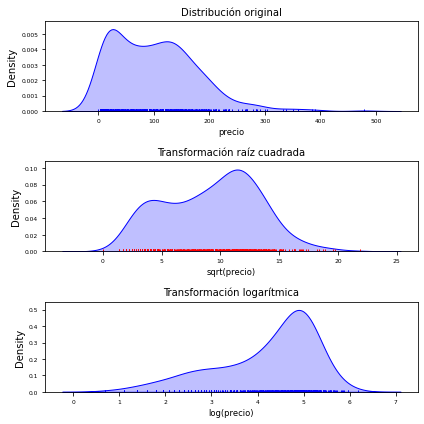

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    datos_1.BUDAPEST,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    datos_1.BUDAPEST,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(datos_1.BUDAPEST),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(datos_1.BUDAPEST),
    color   = "red",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(datos_1.BUDAPEST),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(datos_1.BUDAPEST),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

ValueError: ignored

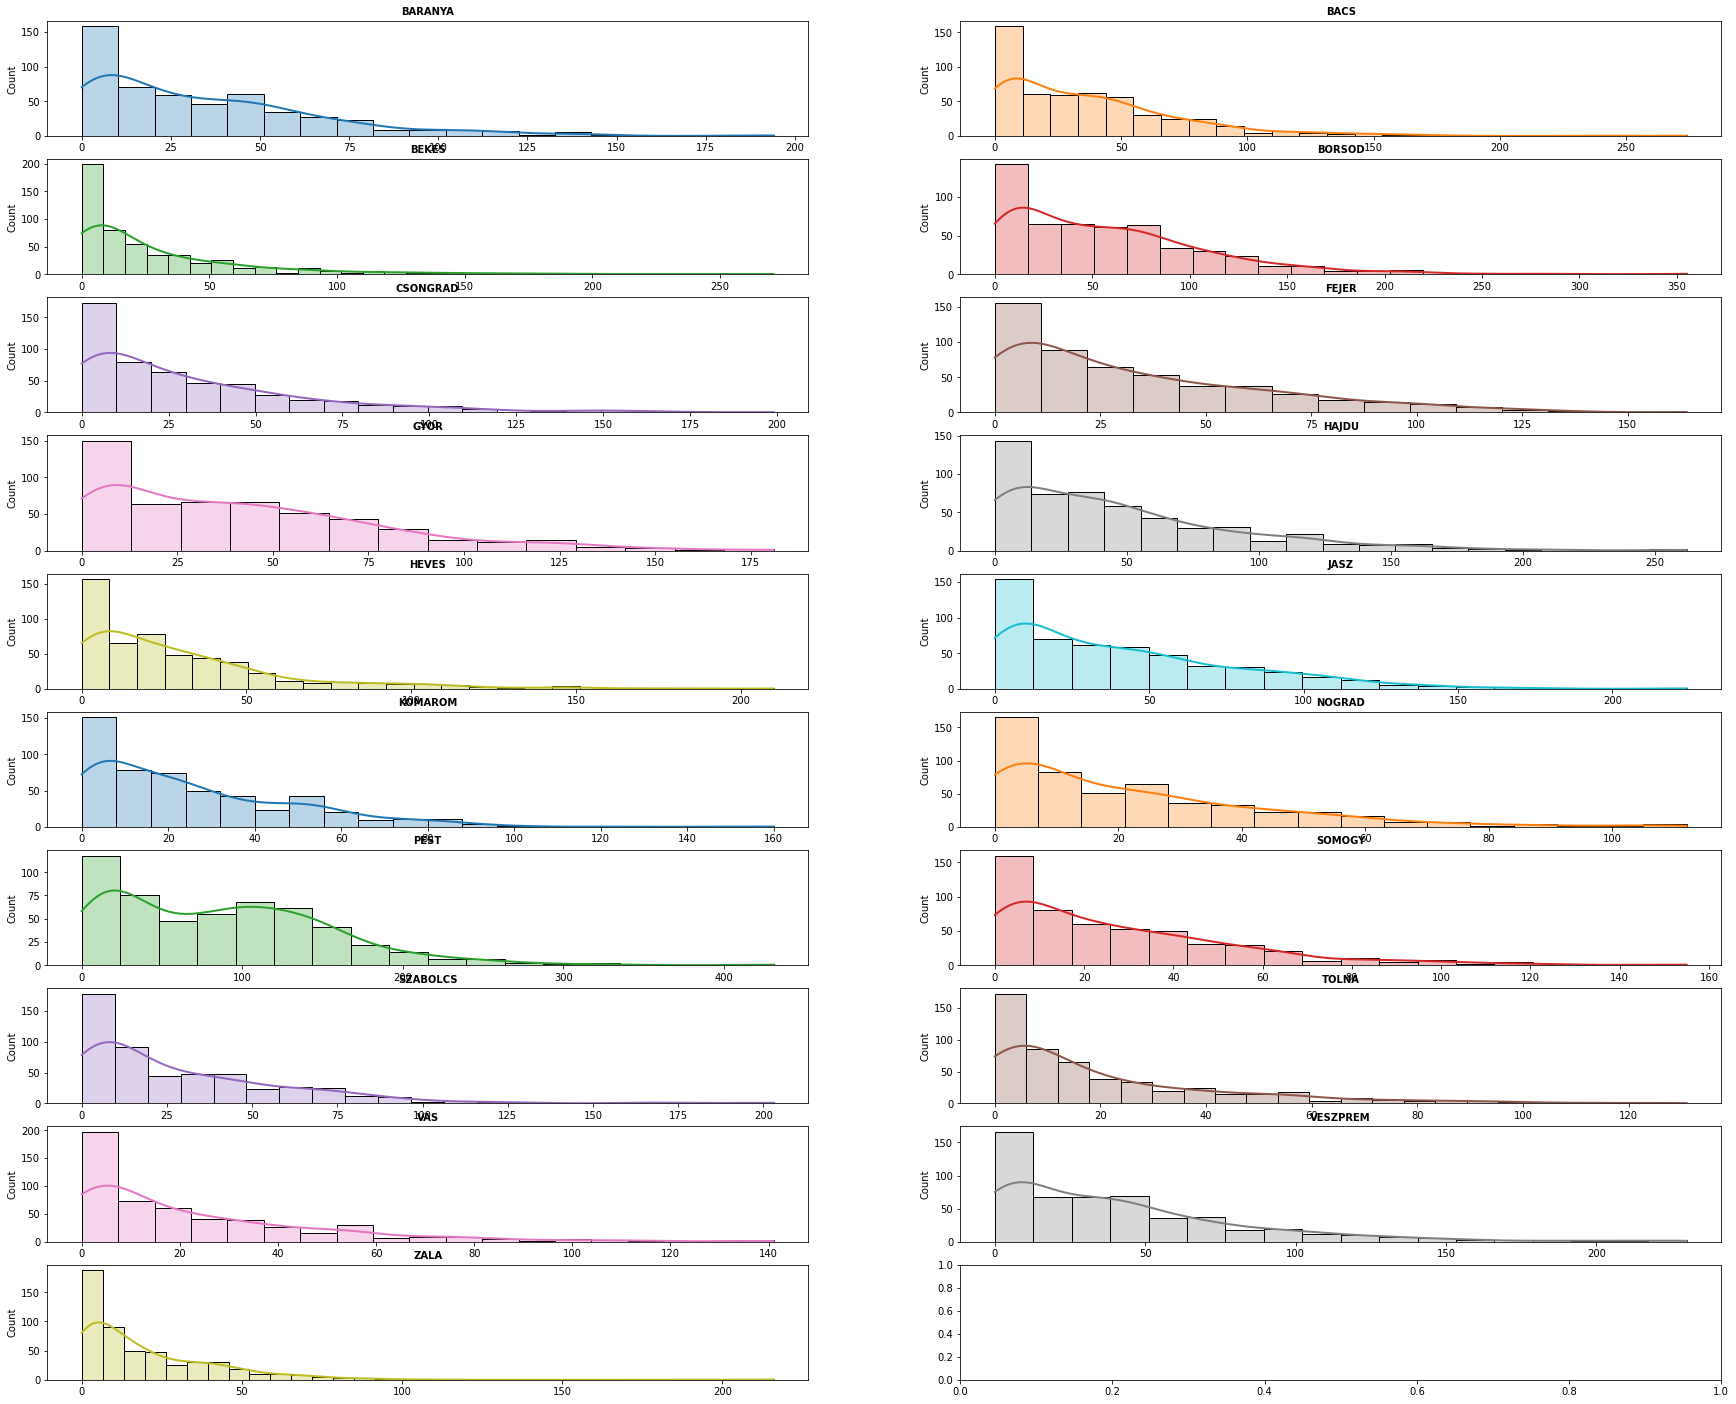

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(30,25))
axes = axes.flat
columnas_numeric = datos_1.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('BUDAPEST')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = datos,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos_1.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
13,BUDAPEST,PEST,0.765108,0.765108
260,PEST,BUDAPEST,0.765108,0.765108
146,GYOR,FEJER,0.716062,0.716062
127,FEJER,GYOR,0.716062,0.716062
151,GYOR,KOMAROM,0.700550,0.700550
227,KOMAROM,GYOR,0.700550,0.700550
33,BARANYA,PEST,0.698257,0.698257
261,PEST,BARANYA,0.698257,0.698257
153,GYOR,PEST,0.673638,0.673638
267,PEST,GYOR,0.673638,0.673638


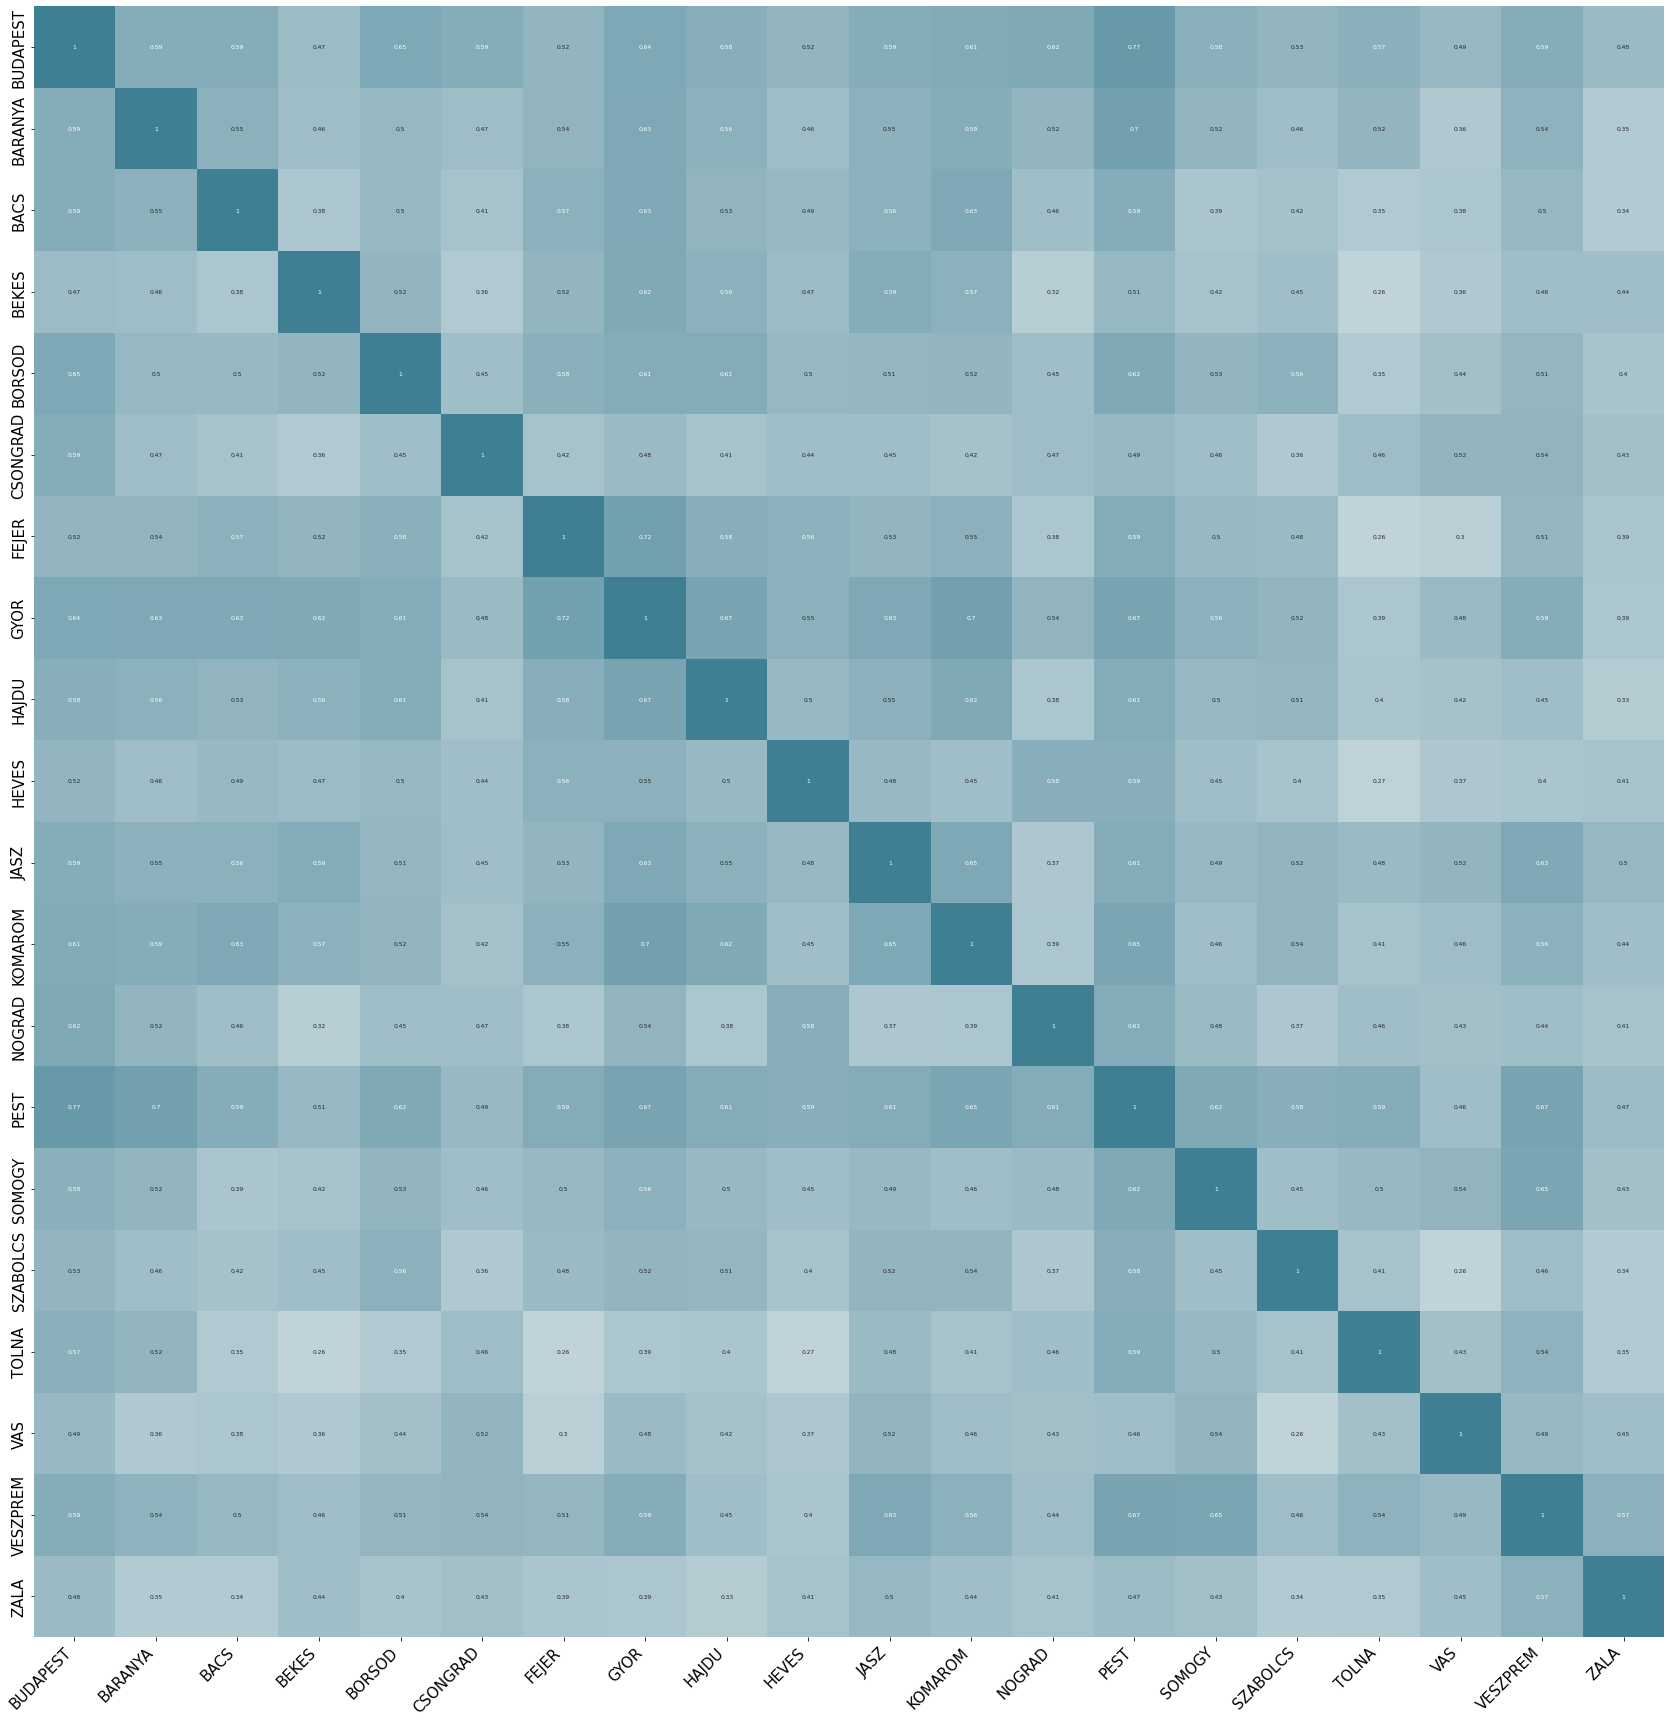

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,30))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 15)

Cambiando el tipo de valor de las columnas creadas pues son tipo object

In [ ]:
datos_1['DIA'] = datos_1['DIA'].astype(float, errors = 'raise')
datos_1['MES'] = datos_1['MES'].astype(float, errors = 'raise')
datos_1['ANIO'] = datos_1['ANIO'].astype(float, errors = 'raise')

# **División del conjunto de Entrenemiento y el de Testeo**

In [ ]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

datos_2=datos_1.drop(['Date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_2.drop('BUDAPEST', axis = 'columns'),
                                        datos_2['BUDAPEST'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [ ]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    417.000000
mean      97.057554
std       73.725951
min        0.000000
25%       31.000000
50%       87.000000
75%      144.000000
max      479.000000
Name: BUDAPEST, dtype: float64


In [ ]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    105.000000
mean     117.876190
std       84.349057
min        2.000000
25%       48.000000
50%      114.000000
75%      175.000000
max      391.000000
Name: BUDAPEST, dtype: float64


# **Filtro**

Las características de datos que se utiliza para entrenar los modelos de Machine Learning tienen una gran influencia en el rendimiento que puede lograr. Las características irrelevantes o parcialmente relevantes pueden afectar negativamente el rendimiento del modelo. En este capítulo, se describirán las técnicas de selección automática de características que pueden ser utilizadas para preparar los datos.

Es recomendable realizar una validación cruzada de eliminación de características recursivas (RFECV) antes de ejecutar la eliminación de características recursivas (RFE)

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selector.support_


array([False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True])

In [ ]:
selector.ranking_

array([ 8, 14, 10,  3,  1, 16, 11,  9,  7, 18,  1,  1,  2,  6, 15,  4,  5,
       12, 13, 17,  1,  1])

Ahora se muestran las características a eliminar en función de la eliminación de características recursivas realizada anteriormente

In [ ]:
columns_to_remove = X_train.columns.values[np.logical_not(selector.support_)]
columns_to_remove

array(['BARANYA', 'BACS', 'BEKES', 'BORSOD', 'FEJER', 'GYOR', 'HAJDU',
       'HEVES', 'JASZ', 'PEST', 'SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS',
       'VESZPREM', 'ZALA', 'DIA'], dtype=object)

In [ ]:
X_train=X_train.drop(['BARANYA', 'BACS', 'BEKES', 'BORSOD', 'FEJER', 'GYOR', 'HAJDU',
       'HEVES', 'JASZ', 'PEST', 'SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS',
       'VESZPREM', 'ZALA', 'DIA'],axis=1)

In [ ]:
# Selección de las variables por tipo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)],
                remainder = 'passthrough',
                verbose_feature_names_out = False
               ).set_output(transform="pandas")

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

X_train_prep.head(10)


,CSONGRAD,KOMAROM,NOGRAD,MES,ANIO
74,2.571003,-0.015982,0.355075,-0.161882,-1.189786
288,-0.596099,-0.302182,-0.840795,0.130347,0.206810
266,-0.418504,-0.138639,0.709407,-1.330797,0.206810
160,-0.477702,0.351990,-0.619337,-1.623026,-0.491488
205,-0.507301,-0.547496,1.329488,1.591491,-0.491488
362,-0.477702,-0.220410,1.595237,1.591491,0.555959
419,-0.892089,-0.465725,1.595237,-1.623026,1.254257
482,3.340580,-0.588382,0.797990,-1.038569,1.603406
13,0.676662,1.660333,-0.707920,-0.746340,-1.538935
44,-0.359306,1.047047,0.177909,1.299262,-1.538935


# ***REGRESION LINEAL ***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipeline: preprocesado + modelo
# ==============================================================================

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid_REG = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid_REG.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid_REG.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)


,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
4,13.560151,-41.953694,4.935924,-41.07867,1.221856


/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


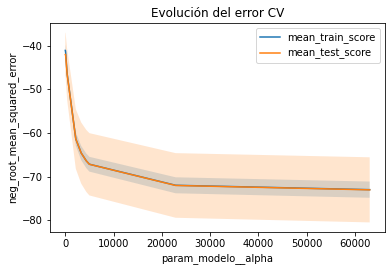

In [ ]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid_REG.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid_REG.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 62.72458671768049


 **Función de puntuación de regresión**.

La mejor puntuación posible es 1.0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor). En el caso general cuando la verdadera y es no constante, un modelo constante que siempre predice el promedio Y Haciendo caso omiso de las características de entrada, obtendría una puntuación de 0,0.

En el caso particular cuando es constante, la puntuación no es finito: es (predicciones perfectas) o (predicciones imperfectas). Para evitar que tales números no finitos contaminen Experimentos de nivel superior, como una validación cruzada de búsqueda en cuadrícula, de forma predeterminada Estos casos se reemplazan con 1.0 (predicciones perfectas) o 0.0 (imperfecto predicciones) respectivamente. Puede establecer en Evite que esta solución suceda.y_true
NaN-Infforce_finiteFalse

# ***Vecinos mas cercanos ***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid_KN = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid_KN.fit(X = X_train, y = y_train)
resultados = pd.DataFrame(grid_KN.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
5,26,-43.738575,5.617634,-42.289914,1.453454


Usando los valores estimados

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


Text(0.5, 1.0, 'Evolución del error CV')

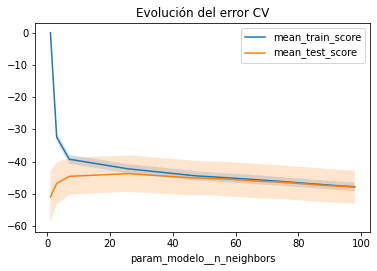

In [ ]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro_KN= 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro_KN, ascending = False)
metrica    = grid_KN.scoring

resultados.plot(hiperparametro_KN, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro_KN, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro_KN].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro_KN].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
#ax.set_ylabel(metrica);

In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid_KN.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_knn}")

from sklearn.metrics import r2_score 
r2 = r2_score(
    y_true=y_test,
    y_pred = predicciones)

print("Se trata de un ajuste de :",r2)

El error (rmse) de test es: 63.06399592808548
Se trata de un ajuste de : 0.43563708192805606
